<a href="https://colab.research.google.com/github/GiorgoR/Data-Science-/blob/main/FR_M11_GR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk #Instalacion de Natural Language Toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [ ]:
import nltk #Descargar e utilizar diccionarios
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import  PorterStemmer, WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_fwf('/content/drive/MyDrive/Colab Notebooks/MODULO 11/Reto/financialTweets.zip', names=['tweets'])
#df.head()

In [ ]:
#!unzip /content/financialTweets.zip -d archivos

In [ ]:
import xml.etree.ElementTree as et
import os

In [ ]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/content/drive/MyDrive/Colab Notebooks/MODULO 11/Reto/financialTweets.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
stockerbot-export.csv                          2019-10-02 14:23:12      7277599
stocks_cleaned.csv                             2019-10-02 14:23:14        11366
Extracting all the files now...
Done!


In [ ]:
datos = pd.read_csv("stockerbot-export.csv", on_bad_lines = 'skip')
datos.head()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


In [ ]:
datos['text'].isna().sum() #Corroborar si hay datos nulos en columna text

0

In [ ]:
corpus = datos[['text']] #creación de corpus
corpus.head(10)

,text
0,VIDEO: “I was in my office. I was minding my o...
1,The price of lumber $LB_F is down 22% since hi...
2,Who says the American Dream is dead? https://t...
3,Barry Silbert is extremely optimistic on bitco...
4,How satellites avoid attacks and space junk wh...
5,.@RealMoney's David Butler's favorite FANG sto...
6,Don’t miss my convo with one of my favorite th...
7,U.S. intelligence documents on Nelson Mandela ...
8,Senate wants emergency alerts to go out throug...
9,Hedge fund manager Marc Larsy says bitcoin $40...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords_en = stopwords.words('english')
print(stopwords_en)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#EXTENSION DE VECTOR STOPWORDS

In [ ]:
print(len(stopwords_en))

179


In [ ]:
stopwords_en.extend(['rt', 'avatar', 'block', 'connect', 'dm']) #se agregaron estas palabrasen ingles al vector ya que son muy usadas en twitter y no agregan algun valor
print(len(stopwords_en))

184


In [ ]:
stopwords_sp = stopwords.words('spanish')
print(stopwords_sp)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
print(len(stopwords_sp))

313


In [ ]:
import string #Remover puntuación
def quita_puntuacion(texto): 
  for caracter in texto:
    if caracter in string.punctuation:
      texto = texto.replace(caracter, '')
  return texto

In [ ]:
import regex as re #Tokenización
def tokeniza(texto):
    return re.findall(r'[\w]*\p{L}[\w]*', texto) #Expresion regular ([\w]: Mayuscula/minusculas/numeros) (* : 0 a N) (\p{L}: caracteres especiales)

In [ ]:
def quita_stopword(palabras): #Remover stopwords ingles
    return [palabra for palabra in palabras if palabra.lower() not in stopwords_en]

In [ ]:
def quita_stopword_sp(palabras): #Remover stopwords español
    return [palabra for palabra in palabras if palabra.lower() not in stopwords_sp]

In [ ]:
pipeline = [ quita_puntuacion, str.lower, str.strip, tokeniza, quita_stopword, quita_stopword_sp]

def preprocesa_texto(texto, operaciones):
    palabras_temporal = texto
    for funcion in pipeline:
        palabras_temporal = funcion(palabras_temporal)
        
    return palabras_temporal

#CREACIÓN DE CORPUS

In [ ]:
corpus['tokens'] = corpus['text'].apply(preprocesa_texto, operaciones=pipeline) #Tokens
corpus.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,tokens
0,VIDEO: “I was in my office. I was minding my o...,"[video, office, minding, business, david, solo..."
1,The price of lumber $LB_F is down 22% since hi...,"[price, lumber, lbf, since, hitting, ytd, high..."
2,Who says the American Dream is dead? https://t...,"[says, american, dream, dead, httpstcocrgx19x7sa]"
3,Barry Silbert is extremely optimistic on bitco...,"[barry, silbert, extremely, optimistic, bitcoi..."
4,How satellites avoid attacks and space junk wh...,"[satellites, avoid, attacks, space, junk, circ..."


In [ ]:
corpus['nwords'] = corpus.tokens.apply(len)
corpus

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,tokens,nwords
0,VIDEO: “I was in my office. I was minding my o...,"[video, office, minding, business, david, solo...",12
1,The price of lumber $LB_F is down 22% since hi...,"[price, lumber, lbf, since, hitting, ytd, high...",12
2,Who says the American Dream is dead? https://t...,"[says, american, dream, dead, httpstcocrgx19x7sa]",5
3,Barry Silbert is extremely optimistic on bitco...,"[barry, silbert, extremely, optimistic, bitcoi...",12
4,How satellites avoid attacks and space junk wh...,"[satellites, avoid, attacks, space, junk, circ...",11
...,...,...,...
28259,$FB : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9,"[fb, 29234a9c7f084d5a985fcb1a5554ecf9]",2
28260,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,"[仮想通貨, ビットコインの価格上昇, ８０万円台回復, 約１カ月半ぶり, btc, htt...",7
28261,RT @invest_in_hd: 'Nuff said! $TEL #telcoin #...,"[investinhd, nuff, said, tel, telcoin, telfam,...",13
28262,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,"[仮想通貨, ビットコインの価格上昇, ８０万円台回復, 約１カ月半ぶり, btc, htt...",7


In [ ]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28264 entries, 0 to 28263
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    28264 non-null  object
 1   tokens  28264 non-null  object
 2   nwords  28264 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 662.6+ KB


#HISTOGRAMA DE LONGITUD DE PALABRAS POR TOKEN

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

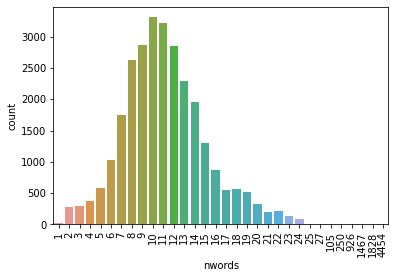

In [ ]:
sns.countplot(corpus['nwords']) #Conteo de numero de palabras por token
plt.xticks(rotation=90)

In [ ]:
from collections import Counter

In [ ]:
contador = Counter() #Contador
corpus.tokens.apply(contador.update)

0        None
1        None
2        None
3        None
4        None
         ... 
28259    None
28260    None
28261    None
28262    None
28263    None
Name: tokens, Length: 28264, dtype: object

In [ ]:
df = pd.DataFrame(contador.most_common(10)) #Top 10 de palabras mas comunes
df

,0,1
0,inc,3987
1,amp,2563
2,earnings,1943
3,stock,1822
4,price,1766
5,analysts,1675
6,eps,1431
7,us,1310
8,new,1203
9,group,1116


In [ ]:
df = pd.DataFrame(contador.most_common(10))
df2 = df.rename(columns={0:'word',
                         1:'frequency'}, 
                inplace=False)
df2

,word,frequency
0,inc,3987
1,amp,2563
2,earnings,1943
3,stock,1822
4,price,1766
5,analysts,1675
6,eps,1431
7,us,1310
8,new,1203
9,group,1116


In [ ]:
#Aqui gracias a este dataframe, nos dimos cuenta que se tenia que
#remover palabras como rt y algunas otras palabras mas usadas en twitter como:
#avatar, block, connect, dm. (Ir a parte de extensión de vectores)

In [ ]:
len(corpus)

28264

In [ ]:
corpus['tokens'].describe()

count                                                 28264
unique                                                25642
top       [morganlbrennan, helsinki2018, underway, worth...
freq                                                     69
Name: tokens, dtype: object

In [ ]:
corpus['text'].describe()

count                                                 28264
unique                                                25685
top       RT @MorganLBrennan: With #Helsinki2018 underwa...
freq                                                     69
Name: text, dtype: object

In [ ]:
corpus.shape

(28264, 3)

In [ ]:
corpus_palabras = []
corpus_palabras = list(i for j in corpus.tokens.to_list() for i in j) #Todas las palabras quintando stopwords, puntuación, etc)

In [ ]:
len(corpus_palabras)

324127

In [ ]:
corpus_palabras[0:20]

['video',
 'office',
 'minding',
 'business',
 'david',
 'solomon',
 'tells',
 'gs',
 'interns',
 'learned',
 'wa',
 'httpstcoqclaitywxv',
 'price',
 'lumber',
 'lbf',
 'since',
 'hitting',
 'ytd',
 'highs',
 'macys']

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def nube_palabras(corpus, stopwords, color):
    stopwords = set(stopwords)
    wordcloud = WordCloud(
        background_color=color,
        stopwords=stopwords,
        max_words=100,
        max_font_size=45,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(20, 20))
    plt.imshow(wordcloud)
    plt.show()

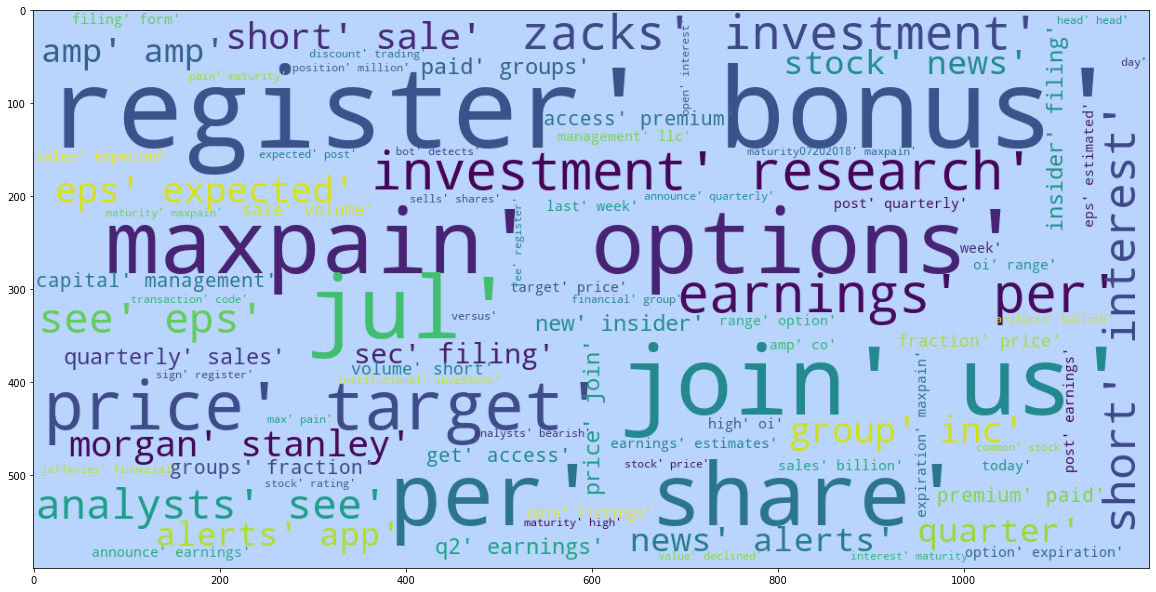

In [ ]:
nube_palabras(corpus_palabras, stopwords_en, '#b9d5fd')

#W2V

In [ ]:
from gensim.models import word2vec

In [ ]:
corpus.head()

,text,tokens,nwords
0,VIDEO: “I was in my office. I was minding my o...,"[video, office, minding, business, david, solo...",12
1,The price of lumber $LB_F is down 22% since hi...,"[price, lumber, lbf, since, hitting, ytd, high...",12
2,Who says the American Dream is dead? https://t...,"[says, american, dream, dead, httpstcocrgx19x7sa]",5
3,Barry Silbert is extremely optimistic on bitco...,"[barry, silbert, extremely, optimistic, bitcoi...",12
4,How satellites avoid attacks and space junk wh...,"[satellites, avoid, attacks, space, junk, circ...",11


In [ ]:
modelow2v = word2vec.Word2Vec(corpus.tokens.to_list())

In [ ]:
print(modelow2v)

Word2Vec(vocab=6820, size=100, alpha=0.025)


In [ ]:
modelow2v.wv.vocab

{'video': <gensim.models.keyedvectors.Vocab at 0x7f3c89b2cc90>,
 'office': <gensim.models.keyedvectors.Vocab at 0x7f3c89b77cd0>,
 'business': <gensim.models.keyedvectors.Vocab at 0x7f3c89b77c10>,
 'david': <gensim.models.keyedvectors.Vocab at 0x7f3c8b6ab950>,
 'tells': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0450>,
 'gs': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0dd0>,
 'wa': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0790>,
 'price': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0f50>,
 'lumber': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb02d0>,
 'lbf': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0690>,
 'since': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0710>,
 'hitting': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0c90>,
 'ytd': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0f10>,
 'highs': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0e50>,
 'macys': <gensim.models.keyedvectors.Vocab at 0x7f3c89bb0cd0>,
 'turnaround': <gensim.models.keyedvectors.

In [ ]:
modelow2v["inc"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.4636583 ,  0.44556022,  0.151647  ,  0.5659596 , -0.16938706,
       -0.42462203,  1.0090728 , -0.5619543 ,  0.767027  , -0.03544132,
       -0.887203  , -0.3264055 , -0.02171458, -0.86357534,  1.4729261 ,
        0.71651006,  1.0111083 ,  0.95366275, -0.34718022, -0.22538556,
        0.18065983,  1.3778251 , -0.23481975, -0.6856807 ,  0.9645674 ,
       -0.54301065,  0.9651346 , -0.08408882,  0.08866778, -0.3664494 ,
        0.42496985, -1.1404504 ,  1.5610913 ,  0.3136521 , -0.7459204 ,
        0.40324083,  0.3742142 , -0.5811617 , -0.8463399 , -0.26491717,
        1.607391  ,  1.4617834 , -0.21600749, -0.22293967, -1.164703  ,
       -0.02800713, -0.08926918,  1.7159302 ,  2.008509  ,  1.6135138 ,
       -0.0937729 , -0.07382237, -0.35222453, -0.4614771 , -0.5298249 ,
       -2.5553195 , -1.1995152 , -0.28066134,  0.04576392,  0.26179168,
       -1.4619709 ,  0.71051854, -0.5263063 , -0.96698475,  0.15473096,
       -1.4825618 ,  0.87541765, -1.410095  ,  1.0951127 ,  0.74

In [ ]:
modelow2v.wv.most_similar('inc')

[('akamai', 0.9202316403388977),
 ('discovery', 0.9036576747894287),
 ('motorola', 0.8968457579612732),
 ('companies', 0.8894556164741516),
 ('solutions', 0.8843595385551453),
 ('varian', 0.8837647438049316),
 ('ecolab', 0.8789355158805847),
 ('communications', 0.8744695782661438),
 ('kellogg', 0.8731239438056946),
 ('brands', 0.8719685673713684)]

#PYSENTIMIENTO


In [ ]:
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pysentimiento import create_analyzer

In [ ]:
asentiment = create_analyzer(task="sentiment", lang='en')

loading configuration file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/cb09766f7ba60b5f7a1bb640617b24f1499c4a6f3ab160c4a0ac171e3a377c68.008dca06003188334001a96363da79ced4944abc68d94a2f1e0db786dc5aa08b
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "n

In [ ]:
p1 = asentiment.predict("Who runs top level government decisions? The banks do. The latest news about $BTC just proved that. #UnseatSherman2018")

In [ ]:
p1.output

'NEU'

In [ ]:
p2 = asentiment.predict('$BABA is coming alive so I hope it will hit 192 for you all who hold more longer than me. I will be happy for you')

In [ ]:
p2.output

'POS'

In [ ]:
p3 = asentiment.predict('@AOTtrades $MOMO is trying to get Angry..')

In [ ]:
p3.output

'NEG'

In [ ]:
pemotions = create_analyzer(task="emotion", lang='en')

loading configuration file https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/c246eed05359b1a49c45955b0265b488e35b0cbd2628e3ead7dd54c8815162ee.a2dff24b4e0a884c6d58a09968c5b68e7391e749eb698ad92541818d420fd01b
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-emotion-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "others",
    "1": "joy",
    "2": "sadness",
    "3": "anger",
    "4": "surprise",
    "5": "disgust",
    "6": "fear"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "disgust": 5,
    "fear": 6,
    "joy": 1,
    "others": 0,
    "sad

In [ ]:
p1 = pemotions.predict("Who runs top level government decisions? The banks do. The latest news about $BTC just proved that. #UnseatSherman2018")

In [ ]:
p1

AnalyzerOutput(output=others, probas={others: 0.685, anger: 0.177, disgust: 0.119, joy: 0.010, fear: 0.004, surprise: 0.003, sadness: 0.002})

In [ ]:
p2 = pemotions.predict('$BABA is coming alive so I hope it will hit 192 for you all who hold more longer than me. I will be happy for you')

In [ ]:
p2

AnalyzerOutput(output=joy, probas={joy: 0.977, others: 0.014, surprise: 0.002, anger: 0.002, sadness: 0.002, fear: 0.001, disgust: 0.001})

In [ ]:
p3 = pemotions.predict('@AOTtrades $MOMO is trying to get Angry..')

In [ ]:
p3

AnalyzerOutput(output=others, probas={others: 0.960, joy: 0.018, anger: 0.008, disgust: 0.004, surprise: 0.004, fear: 0.004, sadness: 0.001})

#TSNE

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def visualizar_modeloo_TSNE(modelo,perplejidad, dimensiones, iteraciones):
    etiquetas = []
    tokens = []

    # agregar el vocabulario y configurar t-SNE
    for palabra in modelo.wv.vocab:
        tokens.append(modelo[palabra])
        etiquetas.append(palabra)

    tsne_modelo = TSNE(perplexity= perplejidad, n_components= dimensiones, n_iter=iteraciones, verbose=1)
    nuevos_valores = tsne_modelo.fit_transform(tokens)
    x = []
    y = []
    for value in nuevos_valores:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(32, 32)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(etiquetas[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 6820 samples in 0.001s...
[t-SNE] Computed neighbors for 6820 samples in 2.320s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6820
[t-SNE] Computed conditional probabilities for sample 2000 / 6820
[t-SNE] Computed conditional probabilities for sample 3000 / 6820
[t-SNE] Computed conditional probabilities for sample 4000 / 6820
[t-SNE] Computed conditional probabilities for sample 5000 / 6820
[t-SNE] Computed conditional probabilities for sample 6000 / 6820
[t-SNE] Computed conditional probabilities for sample 6820 / 6820
[t-SNE] Mean sigma: 0.047375
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.176300
[t-SNE] KL divergence after 300 iterations: 3.620847


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12371 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12387 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12414 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12367 missing from current font.
  font.set_

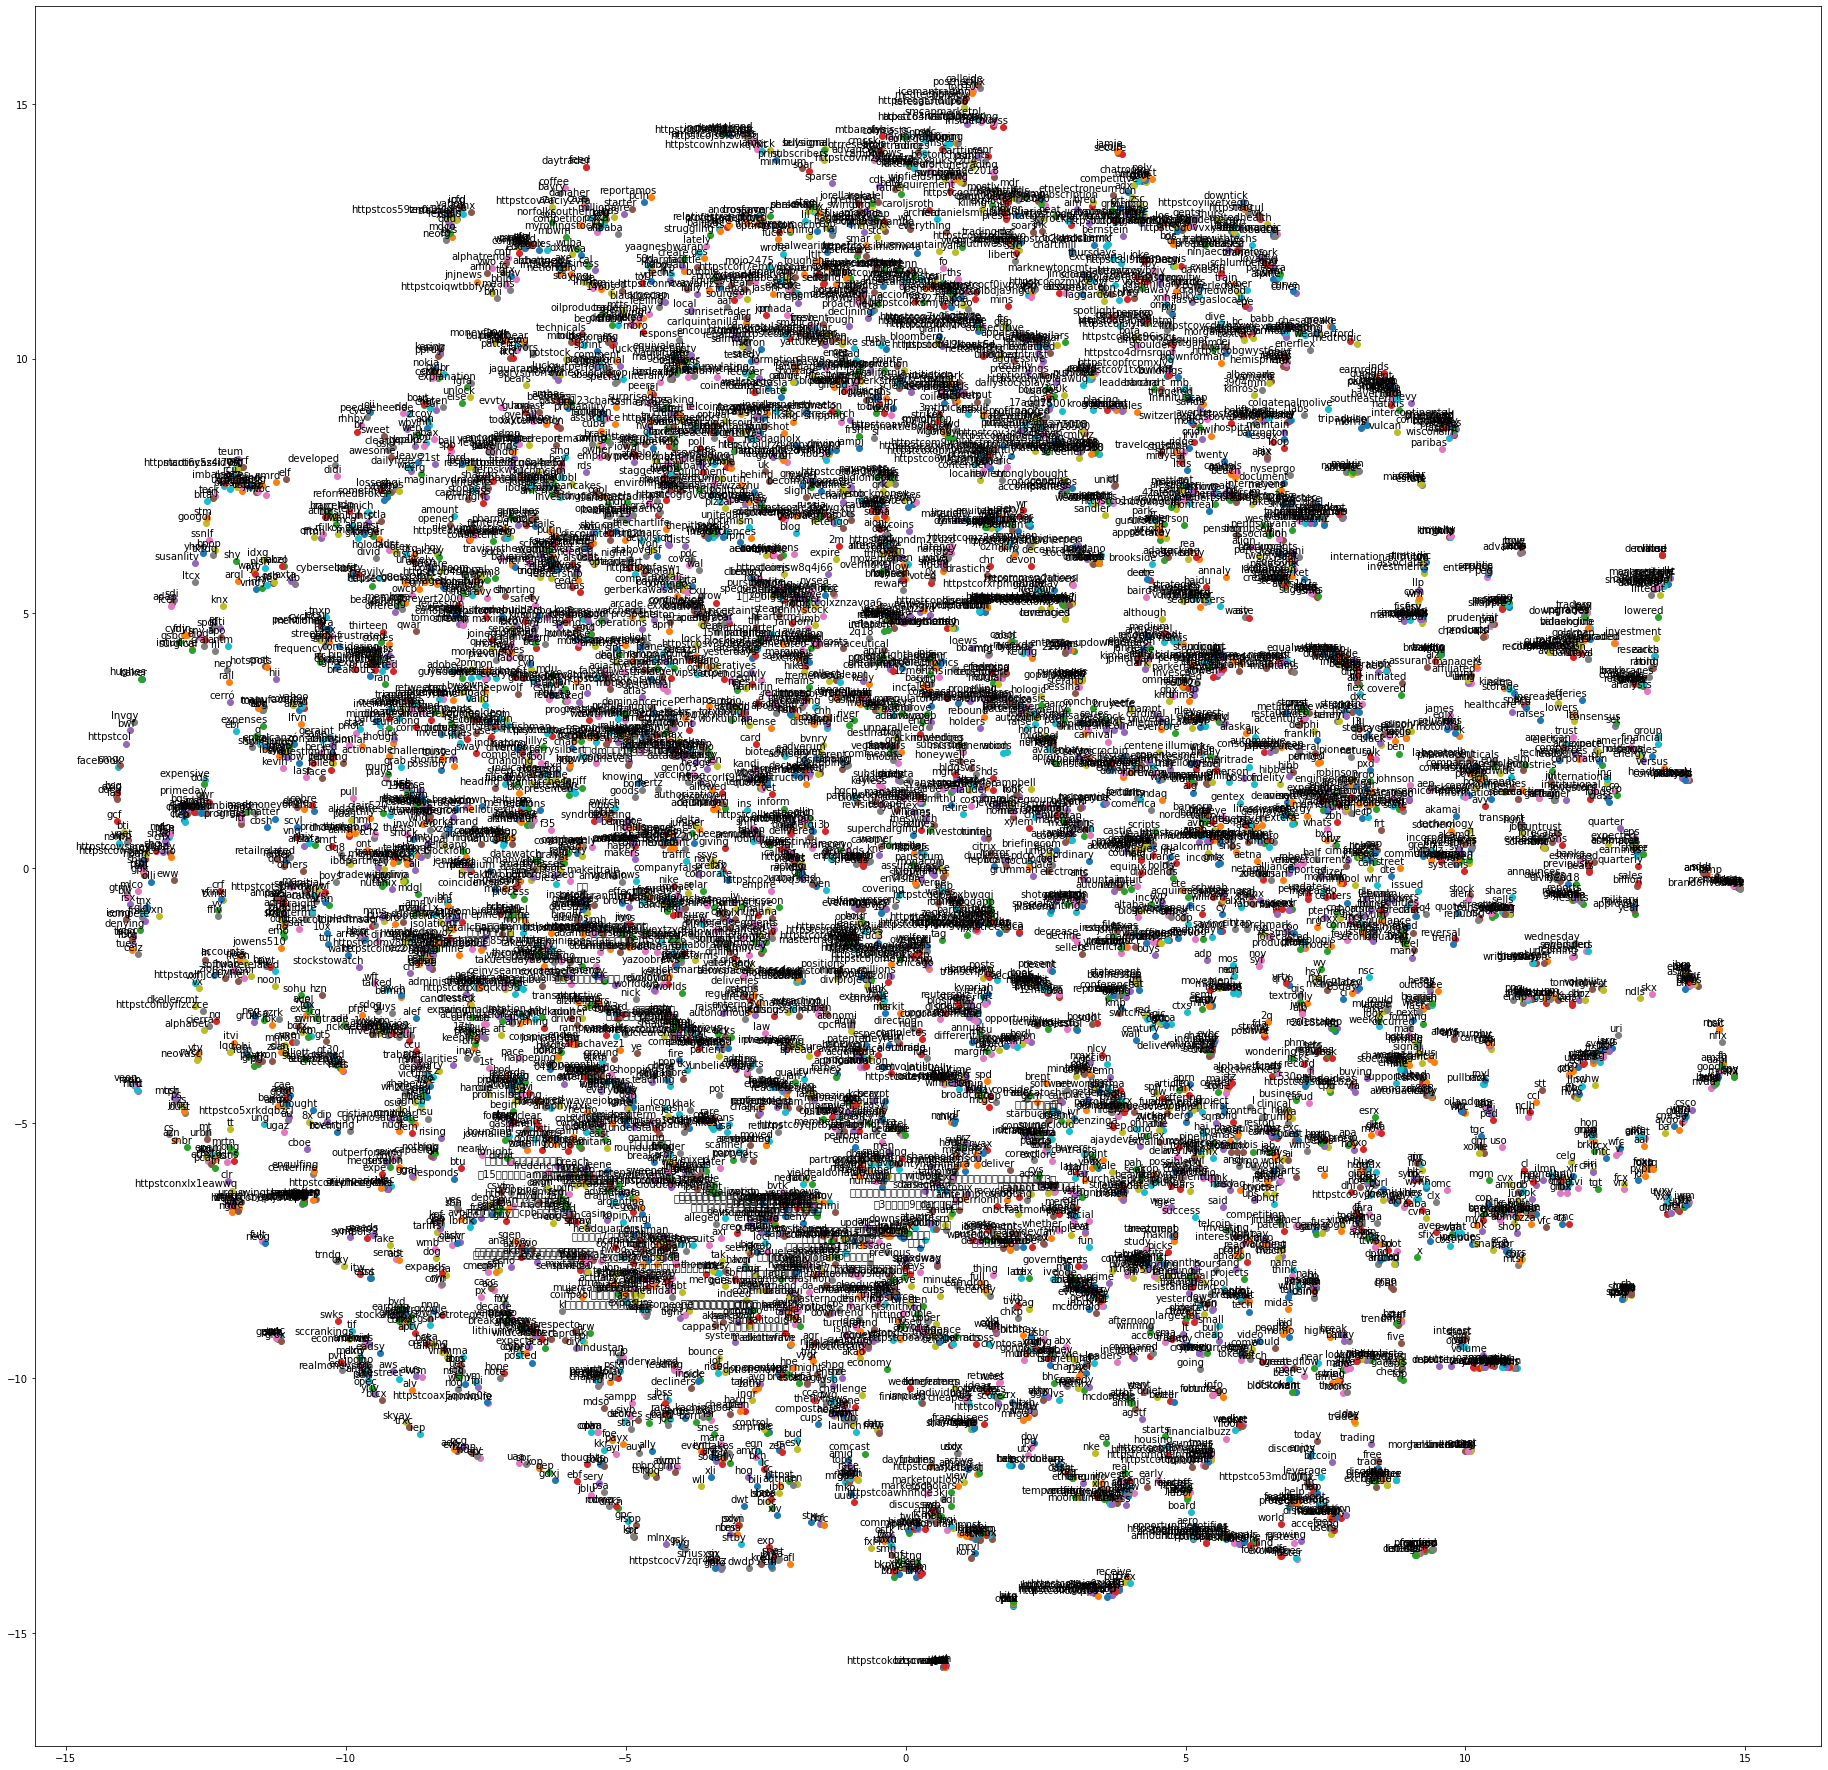

In [ ]:
visualizar_modeloo_TSNE(modelow2v, 5, 2, 300)

#CONCLUSION

In [ ]:
#Primeramente se realizo un analisis de los conceptos que se tenian que tomar en cuenta para la creación
#del corpus, me base con el pipeline para eliminar stopword (EN & SP), puntuación, caracteres especiales, etc.
#Una ves teniendo el corpus se agrego una columna de token, para el proceso de tokenización, y en base
#se creo un histograma con la contabilidad de tokens de cada uno de los tweets, también se identificó cuales
#eran las palabras mas usadas (Top 10), y se eliminó algunas palabras que no nos arrojaban un resultado especifico
#estas palabras estan identificadas en la parte de extensión de vector stopword (algunas de las palabras se 
#sacaron de esta fuente: https://ignaciosantiago.com/terminos-twitter/).
#Se puede observar que la palabra mas utilizada era rt, pero se eliminó por que es muy usada, pero la segunda mas
#usada es la palabra inc, que por lo cual haciendo un W2V, se identifico que esta palabra, en su top 3 esta relaciona con:
#aon (91 %), indsutries(89 %), discovery (88 %).
#Haciendo un PYSENTIMIENTO, se pudo hacer la prueba tanto sentimental como emocional y para 3 tweets, 
# en la parte de sentimiento nos arrojo un resultado para el primero como (P1: NEU, P2: POS, P3: NEG), y para la prueba emocional:
# tomando en base los mismos tweets, nos arrojo un resultado (P1: OTHERS, P2: JOY, P3: OTHERS).
#Por el final tenemos que se realizó un TSNE, para ver de forma mas visual todas las palabras y sus relaciones.